In [ ]:
import pandas as pd
import numpy as np

from os import listdir
from os.path import isfile, join

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CAX_Train1/'

In [ ]:
PH_data_seven = pd.DataFrame()

In [ ]:
files = [f for f in listdir(file_path) if isfile(join(file_path, f))]
for idy, file_iter in enumerate(files):
    print ("File no " + str(idy) + " of "+ str(len(files)))
    data = pd.read_csv('/content/drive/MyDrive/CAX_Train1/'+ file_iter)
    PH_seven = data['PH'] == 7
    PH_data_seven = PH_data_seven.append(data[PH_seven])

File no 0 of 200
File no 1 of 200
File no 2 of 200
File no 3 of 200
File no 4 of 200
File no 5 of 200
File no 6 of 200
File no 7 of 200
File no 8 of 200
File no 9 of 200
File no 10 of 200
File no 11 of 200
File no 12 of 200
File no 13 of 200
File no 14 of 200
File no 15 of 200
File no 16 of 200
File no 17 of 200
File no 18 of 200
File no 19 of 200
File no 20 of 200
File no 21 of 200
File no 22 of 200
File no 23 of 200
File no 24 of 200
File no 25 of 200
File no 26 of 200
File no 27 of 200
File no 28 of 200
File no 29 of 200
File no 30 of 200
File no 31 of 200
File no 32 of 200
File no 33 of 200
File no 34 of 200
File no 35 of 200
File no 36 of 200
File no 37 of 200
File no 38 of 200
File no 39 of 200
File no 40 of 200
File no 41 of 200
File no 42 of 200
File no 43 of 200
File no 44 of 200
File no 45 of 200
File no 46 of 200
File no 47 of 200
File no 48 of 200
File no 49 of 200
File no 50 of 200
File no 51 of 200
File no 52 of 200
File no 53 of 200
File no 54 of 200
File no 55 of 200
Fi

In [ ]:
PH_data_seven.to_pickle('PH_data_seven.df')

In [ ]:

import pandas as pd
import numpy as np

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

import pickle
import itertools

In [ ]:
pickle_file = open("PH_data_seven.df", "rb")

In [ ]:
training_data = pd.read_pickle('PH_data_seven.df')

In [ ]:
training_data

,ACID,Flight_instance_ID,Year,Month,Day,Hour,Minute,Second,ABRK,ELEV_1,...,BPGR_2,BPYR_1,BPYR_2,CALT,CASS,CRSS,DFGS,DWPT,EAI,FF
3833,676,676200405111519,2004,5,11,16,22,11,60.0,-1.004459,...,19.531300,756.837830,0.0,0,120.0,118.915169,1,16,0,1348
3834,676,676200405111519,2004,5,11,16,22,12,60.0,-2.722931,...,19.531300,747.072205,0.0,0,120.0,118.915169,1,16,0,1376
3835,676,676200405111519,2004,5,11,16,22,13,60.0,-5.627968,...,19.531300,903.322632,0.0,0,120.0,118.915169,1,20,0,1382
3836,676,676200405111519,2004,5,11,16,22,14,60.0,-7.796516,...,19.531300,698.243958,0.0,0,120.0,118.915169,1,20,0,1374
3837,676,676200405111519,2004,5,11,16,22,15,60.0,-9.167202,...,19.531300,668.947021,0.0,0,120.0,118.915169,1,20,0,1362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,676,676201003140736,2002,3,14,8,40,9,60.0,-6.937279,...,29.296949,664.064209,0.0,0,120.0,61.962448,1,28,0,1392
3880,676,676201003140736,2002,3,14,8,40,10,60.0,-7.469189,...,29.296949,703.126770,0.0,0,120.0,61.962448,1,28,0,1400
3881,676,676201003140736,2002,3,14,8,40,11,60.0,-6.364456,...,29.296949,654.298523,0.0,0,120.0,61.962448,1,28,0,1410
3882,676,676201003140736,2002,3,14,8,40,12,60.0,-6.466747,...,29.296949,639.650085,0.0,0,120.0,61.962448,1,28,0,1408


In [ ]:
feature_columns = [col for col in training_data.columns if not (col=='FF' or col=='Flight_instance_ID' or  col=='ACID')]

y = training_data['FF'].values
X = training_data[feature_columns].values

In [ ]:
X = StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = VarianceThreshold(threshold=0.0).fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

# **Random Forest**

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_two_rf_gen_seven.model", "wb" )) 


In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['OIPL' 'CWPC_Mean' 'PH' 'OIT_3' 'OIT_2' 'CCPF_Min' 'AOAI_Max' 'GPWS'
 'CCPF_Max' 'TRK_Mean' 'OIT_1' 'EVNT' 'MW' 'AOAC_Min' 'AOAI_Min' 'Year'
 'AOAI_Mean' 'AOAC_Max' 'BAL1_Mean' 'WAI_2' 'VMODE' 'CASM_Max' 'DA_Max'
 'HF2' 'OIT_4' 'CAS_Min' 'FADS' 'SAT' 'CWPF_Max' 'POVT' 'BAL2_Mean'
 'CCPC_Mean' 'FGC3' 'PUSH' 'PI_Max' 'PT_Mean' 'LATG_Min' 'LONG_Mean'
 'SMKB' 'MSQT_1_Mean' 'MH_Max' 'GLS' 'SPLG' 'TRKM_Min' 'GS_Min' 'SPL_1'
 'TRKM_Max' 'RUDP_Min' 'MACH_Min' 'HDGS' 'DA_Mean' 'TRK_Max' 'SMOK'
 'AOA1_Max' 'PT_Max' 'AOA2_Mean' 'PSA_Mean' 'AOA1_Min' 'RUDP_Max'
 'LATG_Max' 'BAL1_Max' 'SPLY' 'APUF_Min' 'TH_Min' 'WAI_1' 'CASM_Min'
 'TOCW_Min' 'TRKM_Mean' 'GS_Mean' 'PACK' 'ALTR_Max' 'ALTR_Min' 'HYDY'
 'TRK_Min' 'BAL2_Max' 'FIRE_4' 'APUF_Mean' 'VIB_1_Min' 'SNAP' 'Hour'
 'N1T_Mean' 'CAS_Mean' 'FLAP' 'CWPF_Min' 'MSQT_2_Min' 'MH_Mean' 'TAS_Min'
 'RUDD_Min' 'SPL_2' 'N1T_Max' 'MRK' 'CCPC_Max' 'PI_Mean' 'MSQT_1_Max'
 'Second' 'DA_Min' 'MSQT_2_Mean' 'ALT_Mean' 'CCPC_Min' 'FQTY_2' 'HF1'
 'TAS_Max' 'ELEV_2' '

In [ ]:
print(np.argsort(rfr.feature_importances_))

[ 38  77  44  41  40  75 130  23  76 173  39   9  36 126 129   0 128 127
 131  67  64 142 145  26  42 138  11  48  82  45 134  71  12  47  91  98
 150 152  49  83 160  22  52 177 147  54 178 105 156  24 143 175  50 121
 100 122  95 120 106 151 133  53  69 171  66 141 111 176 146  43 118 117
  28 174 136  16  68 180  51   3 161 137  17  81  87 158 168 102  55 163
  35  73  89  85   5 144  86 113  72  19  25 169   8 107  31  15 124 139
 167  46   4  37  20  60   7 109 157 179  21 159  59  27  88 119   6  92
  97 123 140  30  90  70  14  29 170  96  74 112 135  65 172  57 165 149
  79   2  63  58  56 166 148  32 108 104 125 115   1  62 101  18  99 110
 154  78 153 155 132 114  80 116  13  34  84  61 164  93 103  33  94  10
 162]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 27.20854153295724


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.8801166875187014


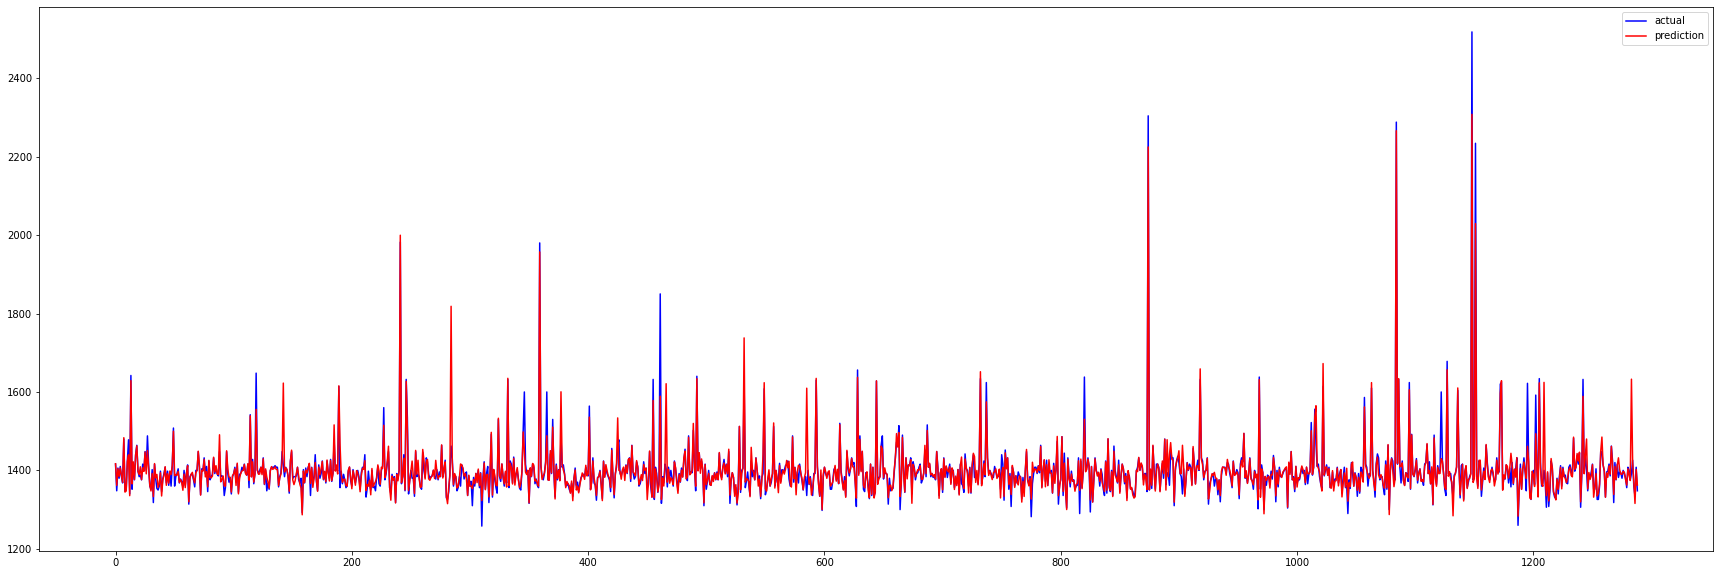

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()


# **GRADIENT BOOSTING REGRESSOR**

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rfr = GradientBoostingRegressor(n_estimators=10, random_state= 0 )

In [ ]:
rfr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=10, random_state=0)

In [ ]:
pickle.dump( rfr, open( "ph_two_rf_gen_seven.model", "wb" )) 


In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['Year' 'TOCW_Min' 'TOCW_Max' 'ALT_Mean' 'ALT_Min' 'ALTR_Min' 'ALTR_Max'
 'AOA1_Mean' 'AOA1_Min' 'AOA1_Max' 'AOA2_Mean' 'AOA2_Min' 'AOA2_Max'
 'AOAC_Mean' 'AOAC_Min' 'AOAC_Max' 'AOAI_Mean' 'AOAI_Min' 'TOCW_Mean'
 'AOAI_Max' 'SHKR_Max' 'SHKR_Mean' 'MSQT_1_Max' 'MSQT_2_Mean' 'PI_Mean'
 'VIB_1_Mean' 'PI_Max' 'PS_Mean' 'PS_Min' 'PSA_Mean' 'PSA_Min' 'PSA_Max'
 'PT_Mean' 'PT_Min' 'PT_Max' 'RUDD_Mean' 'RUDP_Mean' 'RUDP_Min' 'RUDP_Max'
 'SHKR_Min' 'MSQT_1_Min' 'BAL1_Mean' 'BAL1_Max' 'N1T_Mean' 'N1T_Max'
 'NSQT_Mean' 'NSQT_Min' 'NSQT_Max' 'TAS_Mean' 'TAS_Min' 'TAS_Max'
 'TH_Mean' 'TH_Min' 'TH_Max' 'TRK_Mean' 'TRK_Min' 'TRK_Max' 'TRKM_Mean'
 'TRKM_Min' 'TRKM_Max' 'MH_Max' 'BAL1_Min' 'MH_Min' 'LONG_Max' 'BAL2_Mean'
 'BAL2_Min' 'CAS_Mean' 'CAS_Min' 'CAS_Max' 'CASM_Mean' 'CASM_Min'
 'CASM_Max' 'DA_Mean' 'DA_Min' 'DA_Max' 'GS_Mean' 'GS_Max' 'LATG_Min'
 'LATG_Max' 'LONG_Mean' 'LONG_Min' 'MACH_Max' 'MSQT_1_Mean' 'PI_Min'
 'CWPF_Min' 'HF1' 'HF2' 'HYDY' 'ILSF' 'LATP' 'LMOD' 'MNS' 'MRK' 'MW'
 'N1CO' 'OIP

In [ ]:
print(np.argsort(rfr.feature_importances_))

[  0 111 112 113 114 117 118 119 120 121 122 123 124 125 126 127 128 129
 110 130 109 107  85  86  89 179  91  92  93  95  96  97  98  99 100 101
 104 105 106 108  84 131 133 161 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 160 132 159 154 134 135 137 138 139 140 141 142
 143 144 145 146 148 150 151 152 153 157  83  90  81  25  26  28  29  30
  31  34  35  36  37  38  39  82  41  42  43  44  24  45  23  21   1   2
   3   4   5   7   8   9  11  12  14  15  16  17  18  19  20  22  46  40
  48  69  70  47  66  71  64  63  62  61  72  68  74  73  57  49  50  51
  52  53  54  75  55  79  77  76  56  67  27 149  59 147 180 156 102 158
 115  32 116  65 155   6  78  88  13  60  80 136  94  33  87 103  10  58
 162]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 44.847900310322046


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.6742889902769597


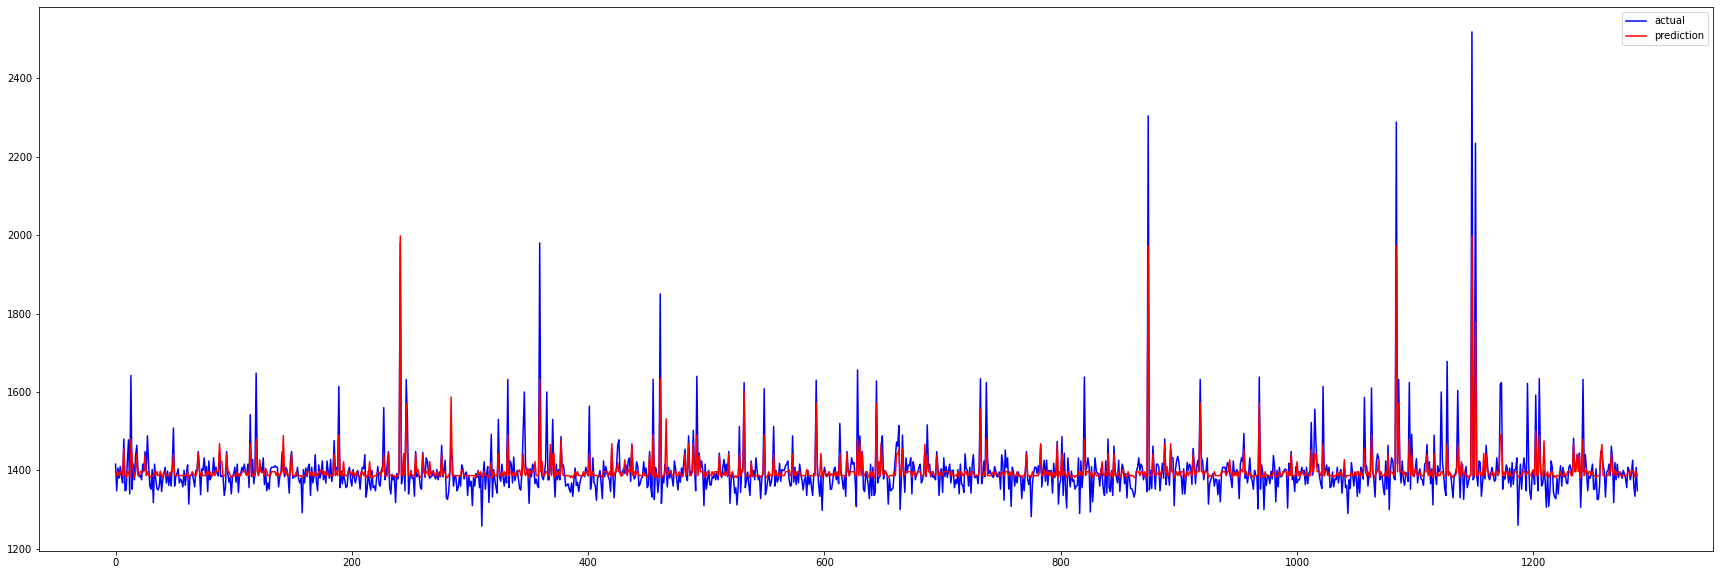

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **K NEAREST NEIGHBOURS**

In [ ]:
from sklearn import neighbors

In [ ]:
rfr = neighbors.KNeighborsRegressor(n_neighbors =20 )

In [ ]:
rfr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:

y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_two_rf_gen_seven.model", "wb" )) 

In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 51.722013566319504


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.5667894180530847


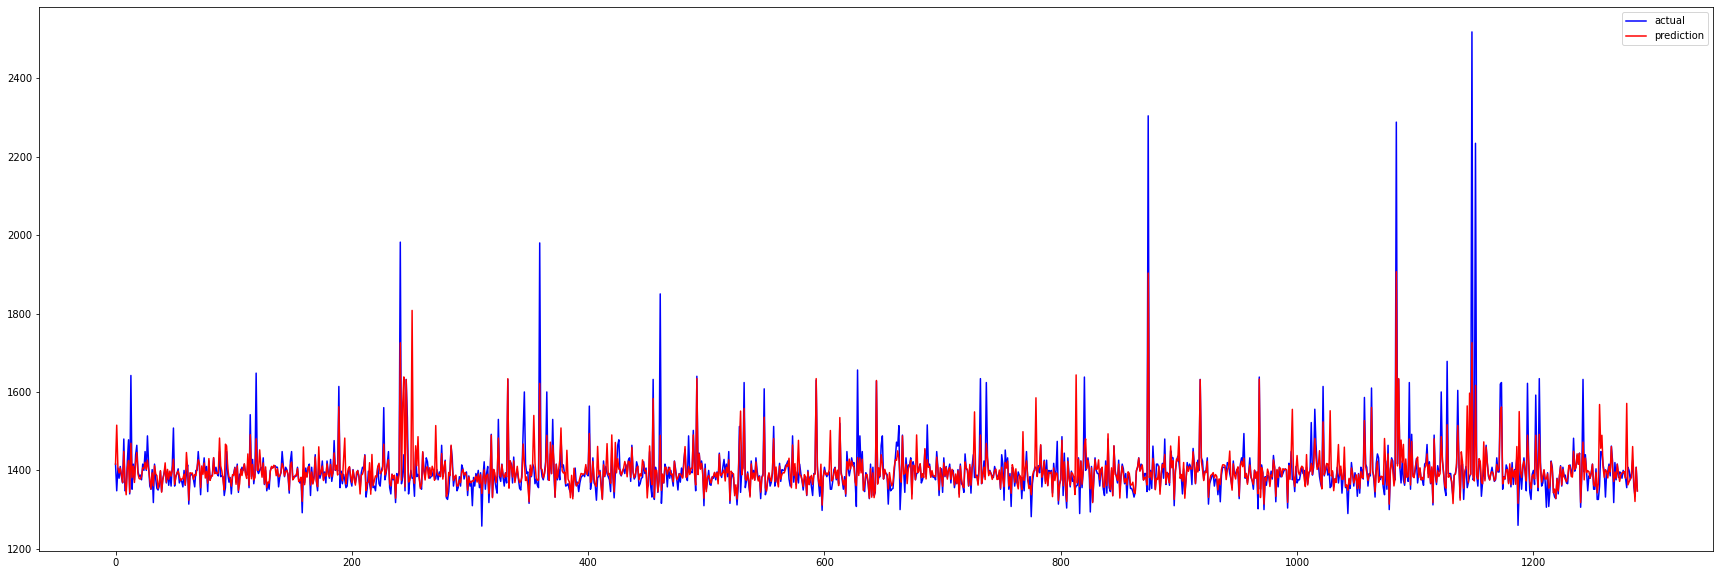

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu',input_shape=(181,)))
                                                                                         
                                                                                         # Adding the second hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
regressor.add(Dense( 1, kernel_initializer = 'glorot_uniform', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = RMSprop(0.001), loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

In [ ]:
regressor.fit(X_train,y_train,epochs=50)

Epoch 1/50
94/94 [==============================] - 1s 2ms/step - loss: 714.9301 - mean_absolute_error: 714.9301
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 164.0106 - mean_absolute_error: 164.0106
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 118.9767 - mean_absolute_error: 118.9767
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 101.2995 - mean_absolute_error: 101.2995
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 91.3105 - mean_absolute_error: 91.3105
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 83.0195 - mean_absolute_error: 83.0195
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 74.9276 - mean_absolute_error: 74.9276
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 71.8789 - mean_absolute_error: 71.8789
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 68.5727 - mean_absolute_error: 6

In [ ]:
y_pred= regressor.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.19891916213288363
MSE: 4946.843084278061
RMSE: 70.33379759602109
MAE: 49.31793904212022


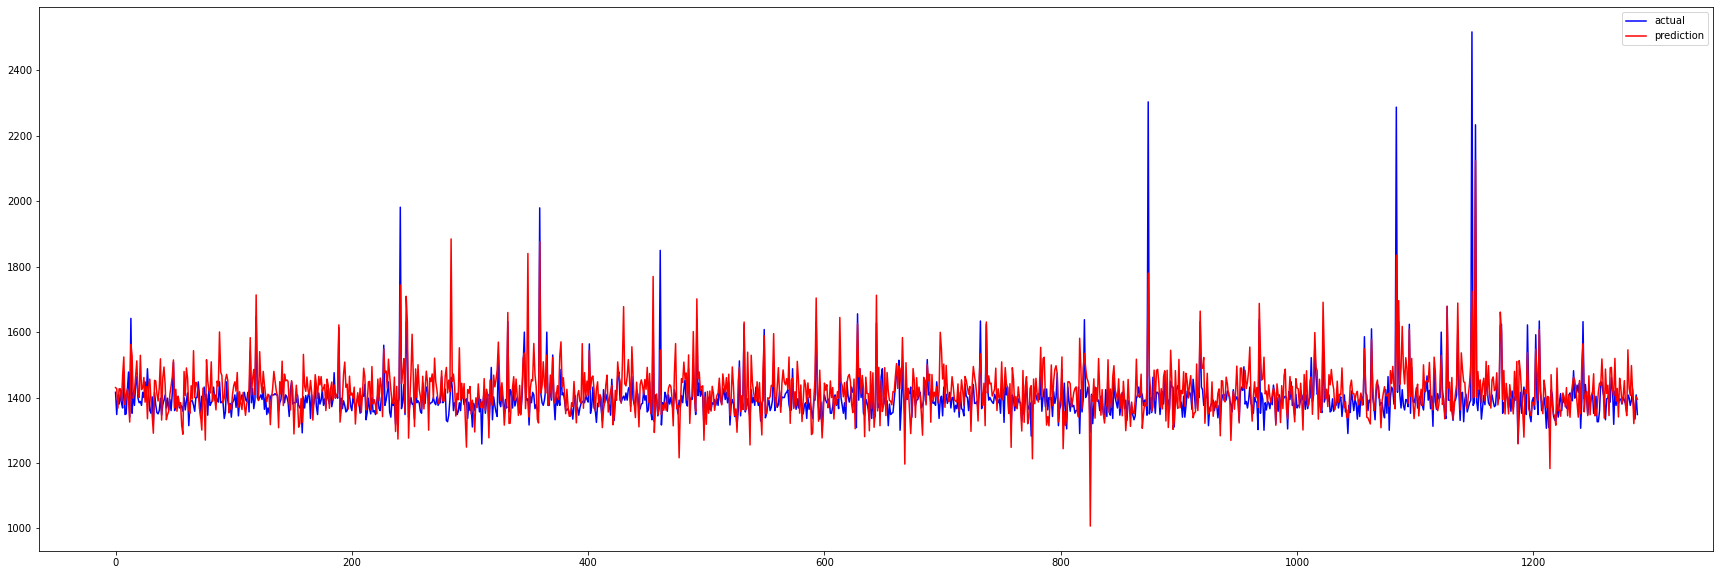

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **CNN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(181,1)))
model.add(Flatten())


In [ ]:
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 180, 32)           96        
                                                                 
 flatten_1 (Flatten)         (None, 5760)              0         
                                                                 
 dense_24 (Dense)            (None, 64)                368704    
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 368,865
Trainable params: 368,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=12,epochs=50, verbose=0)

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.5149462754097319
MSE: 2995.309024469151
RMSE: 54.729416445538234
MAE: 29.893289617829954


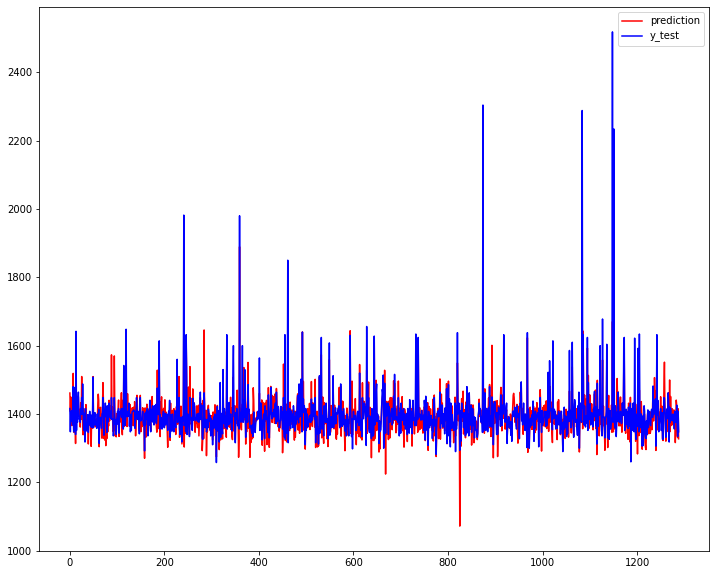

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.plot(y_pred,c='red',label='prediction')
plt.plot(y_val,c='blue',label='y_test')
plt.legend()
plt.show()